<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!curl -O https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0 34.9M    0 49152    0     0  16384      0  0:37:18  0:00:03  0:37:15 14499
  1 34.9M    1  398k    0     0    99k      0  0:05:59  0:00:04  0:05:55 93208
  2 34.9M    2  863k    0     0   172k      0  0:03:27  0:00:05  0:03:22  180k
  3 34.9M    3 1136k    0     0   189k      0  0:03:09  0:00:06  0:03:03  220k
  5 34.9M    5 1852k    0     0   264k      0  0:02:15  0:00:07  0:02:08  363k
  6 34.9M    6 2239k    0     0   279k      0  0:02:07  0:00:08  0:01:59  439k
  7 34.9M    7 2701k    0     0   300k      0  0:01

!wget error kalau di-run di sistemku. Jadi, alternatifnya pakai curl.

Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Sebelumnya, kita panggil dulu data frame nya dari RDBMS, pakai sqlite.
Biar kebayang datanya. 

In [9]:
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


Import matplotlib sama seaborn untuk bikin grafik.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot a histogram of `ConvertedComp.`


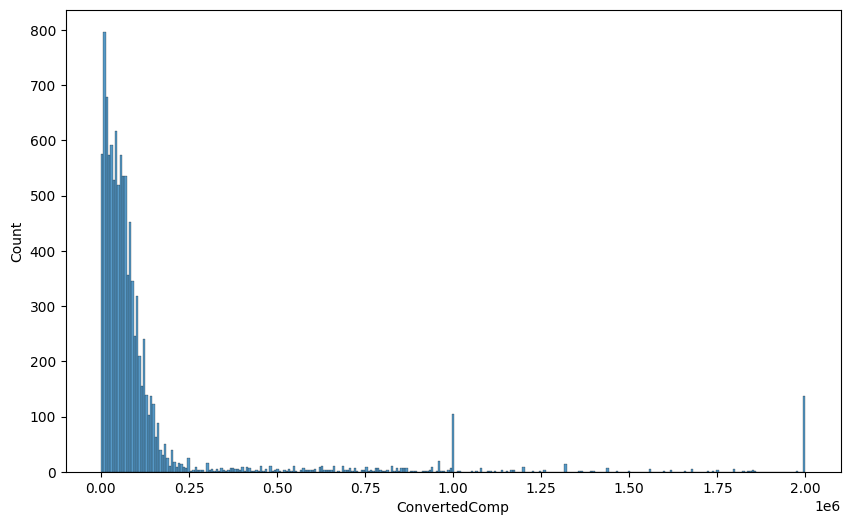

In [11]:
# your code goes here
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedComp'])
plt.show()

### Box Plots


Plot a box plot of `Age.`


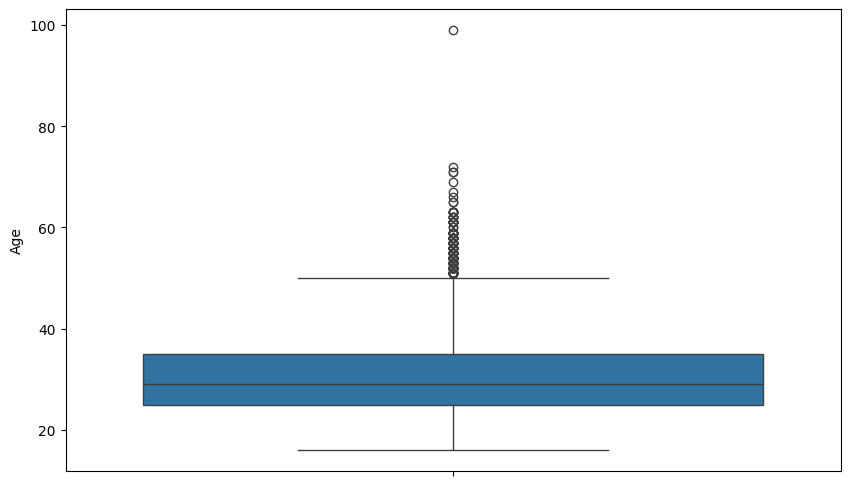

In [12]:
# your code goes here

plt.figure(figsize=(10,6))
sns.boxplot(df['Age'])
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


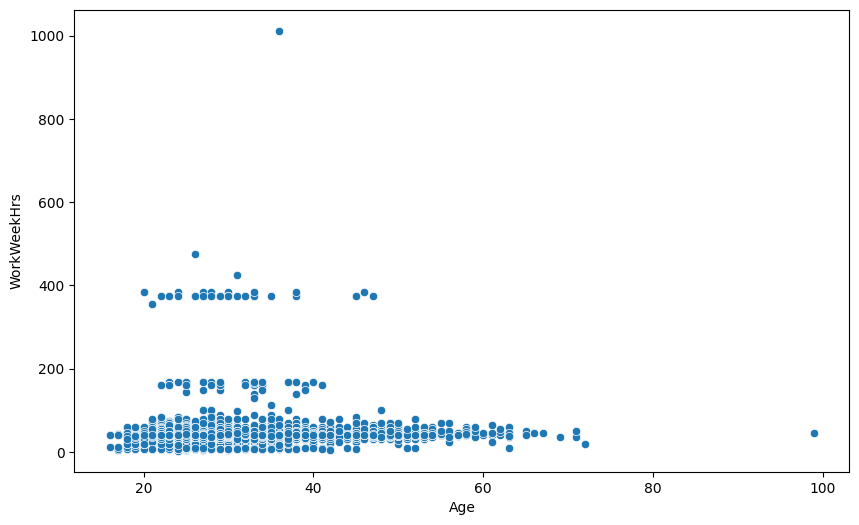

In [13]:
# your code goes here

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='WorkWeekHrs', data=df)
plt.show()

Interpretasi: Antara Age sama WorkWeekHrs, ga bisa dibilang fully ga ada korelasi sama sekali. Ini lebih, ke ga jelas aja. Belum clear yang sampai bisa ditarik kesimpulan kalau, sama sekali ga ada korelasi di antara dua variabel ini. 

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


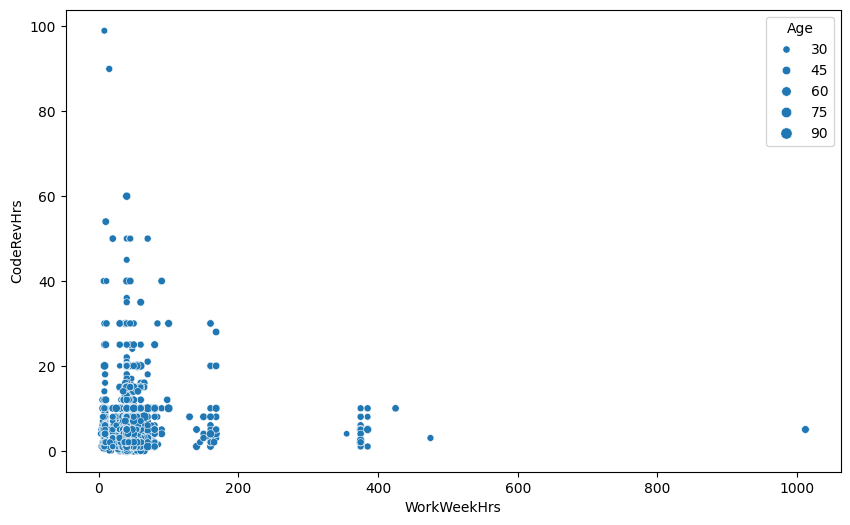

In [14]:
# your code goes here

plt.figure(figsize=(10,6))
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', data=df)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


Aku belum kebayang. Coba liat list kolomnya dulu

In [15]:
df.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

Ga ada tanda-tanda kolom yang mengindikasikan database yang ingin dipelajari responden tahun depan. Daaann, pas diliat lagi list nama tabel dari rdbms nya, ternyata ada tabel yang namanya DatabaseDesireNextYear. Jadii, kita bikin dataframe baru dari tabel ini, pakai sqlite.

In [16]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df2 = pd.read_sql_query(QUERY,conn)
df2.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


Dari sini keliatan, kolom yang kita butuhkan untuk bikin pie chart nya tersedia di dataframe yang baru ini. Selanjutnya yang perlu kita lakukan adalah menghitung masing-masing kemunculan data dari setiap database yang ingin dipelajari responden, lalu hasil 5 teratasnya dimasukkan ke dataframe baru: top5

In [17]:
df3 = df2['DatabaseDesireNextYear'].value_counts()
top5 = df3.head()
top5

DatabaseDesireNextYear
PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
Name: count, dtype: int64

Baru deh sekarang kita bisa bikin pie chart nya.

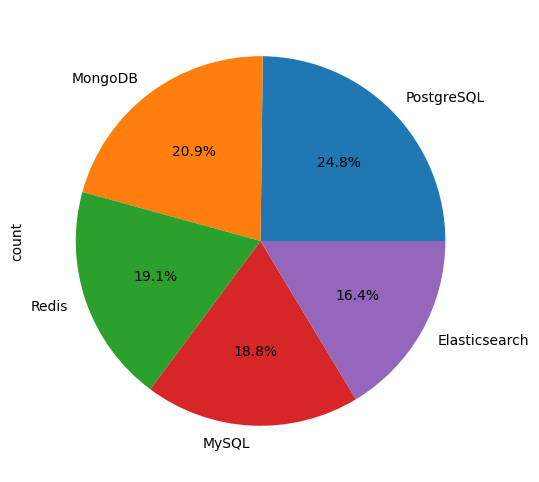

In [18]:
# your code goes here

plt.figure(figsize=(10,6))
top5.plot(kind='pie', autopct='%1.1f%%')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Kenapa median ya? 
Dan lagi, belum kebayang datanya juga.
Coba panggil dulu

In [19]:
df['WorkWeekHrs'].head()

0    80.0
1    32.0
2    40.0
3    40.0
4    45.0
Name: WorkWeekHrs, dtype: float64

In [20]:
df['CodeRevHrs'].head()

0     NaN
1    12.0
2     5.0
3     NaN
4     5.0
Name: CodeRevHrs, dtype: float64

Oh mulai kebayang. Mungkin stacked chartnya itu buat bandingin median keduanya untuk grup usia 30 sampai 35? Jadi x label nya usia 30, 31, ..., 35, lalu y nya jam. Berarti kita perlu filter data framenya dulu biar datanya isinya data dari responden berusia 30 sampai 35 aja. 

In [21]:
age_30_35 = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

In [22]:
print(age_30_35.groupby('Age')['WorkWeekHrs'].median())

Age
30.0    40.0
31.0    40.0
32.0    40.0
33.0    40.0
34.0    40.0
35.0    40.0
Name: WorkWeekHrs, dtype: float64


In [23]:
print(age_30_35.groupby('Age')['CodeRevHrs'].median())

Age
30.0    4.0
31.0    4.0
32.0    4.0
33.0    4.0
34.0    4.0
35.0    4.0
Name: CodeRevHrs, dtype: float64


kenapa bisa kembar semua ya mediannya??

Sekarang bikin stacked chartnya. 

<Figure size 800x600 with 0 Axes>

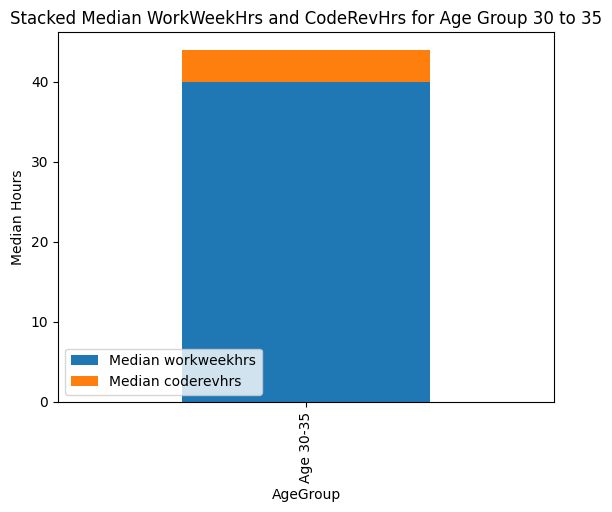

In [42]:
# your code goes here

# Hitung median WorkWeekHrs dan CodeRevHrs untuk age group 30 to 35
median_workweekhrs = age_30_35['WorkWeekHrs'].median()
median_coderevhrs = age_30_35['CodeRevHrs'].median()

# Buat DataFrame untuk data yang akan di-plot
data = {
    'AgeGroup': ['Age 30-35'],
    'Median workweekhrs': [median_workweekhrs], 
    'Median coderevhrs': [median_coderevhrs]
}

df_median = pd.DataFrame(data)
df_median.set_index('AgeGroup', inplace=True)

plt.figure(figsize=(8,6))
df_median.plot(kind='bar', stacked=True)

# Menampilkan chart
plt.title('Stacked Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.ylabel('Median Hours')
plt.show()

Sekarang ngerjain graded quiz.
Pertanyaannya:
- Question 2: In the list of most popular languages respondents wish to learn next year, what is the rank of Python?
- Question 3: How many respondents indicated that they currently work with 'SQL'? 
- Question 4: How many respondents indicated that they work on 'MySQL' only? 

Untuk menjawab question 2, kita perlu panggil tabel LanguageDesireNextYear

In [48]:
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df3 = pd.read_sql_query(QUERY,conn)
df3.head()

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell


In [61]:
df3['LanguageDesireNextYear'].value_counts().head()

LanguageDesireNextYear
JavaScript    6630
HTML/CSS      5328
Python        5239
SQL           5012
TypeScript    4088
Name: count, dtype: int64

Berarti Python ada di **urutan ke 3** bahasa pemrograman terpopuler yang ingin dipelajari tahun depan.

Untuk menjawab question 3, kita perlu panggil tabel LanguageWorkedWith

In [62]:
QUERY = """
SELECT *
FROM LanguageWorkedWith
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df4 = pd.read_sql_query(QUERY,conn)
df4.head()

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL


In [66]:
print('total respondents indicated that they currently work with SQL:', (df4['LanguageWorkedWith'] == 'SQL').sum())

total respondents indicated that they currently work with SQL: 7106


Untuk menjawab question 4, kita perlu panggil tabel DatabaseWorkedWith

In [94]:
QUERY = """
SELECT *
FROM DatabaseWorkedWith
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df5 = pd.read_sql_query(QUERY,conn)
df5.head()

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite


In [98]:
# hitung kemunculan respondent dalam df5
respondent_counts = df5['Respondent'].value_counts()

# filter respondent yang munculnya hanya sekali
# kita butuh itu, soalnya soal yang ditanya berapa responden yang "hanya" kerja menggunakan SQL
respondent_unique = respondent_counts[respondent_counts == 1].index
df5_unique = df5[df5['Respondent'].isin(respondent_unique)]

df5_unique.head()

,Respondent,DatabaseWorkedWith
32,25,MySQL
43,38,Microsoft SQL Server
102,70,Microsoft SQL Server
105,74,DynamoDB
106,75,MongoDB


In [99]:
# filter df5_unique yang menggunakan MySQL
print('Jumlah responden yang hanya menggunakan MySQL:', (df5_unique['DatabaseWorkedWith'] == 'MySQL').sum())

Jumlah responden yang hanya menggunakan MySQL: 474


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


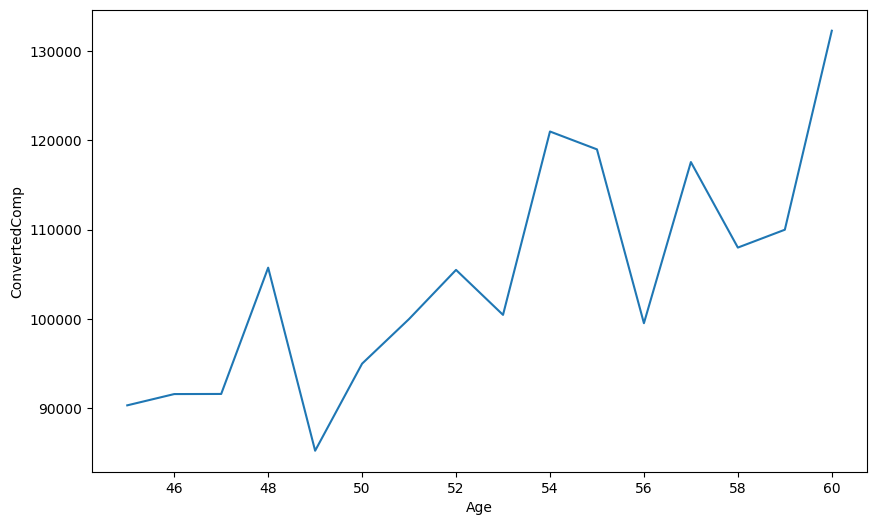

In [111]:
# your code goes here

age_45_60 = df[(df['Age'] >= 45) & (df['Age'] <= 60)]
med_age_45_60 = age_45_60.groupby('Age')['ConvertedComp'].median()

plt.figure(figsize=(10,6))
sns.lineplot(med_age_45_60)

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


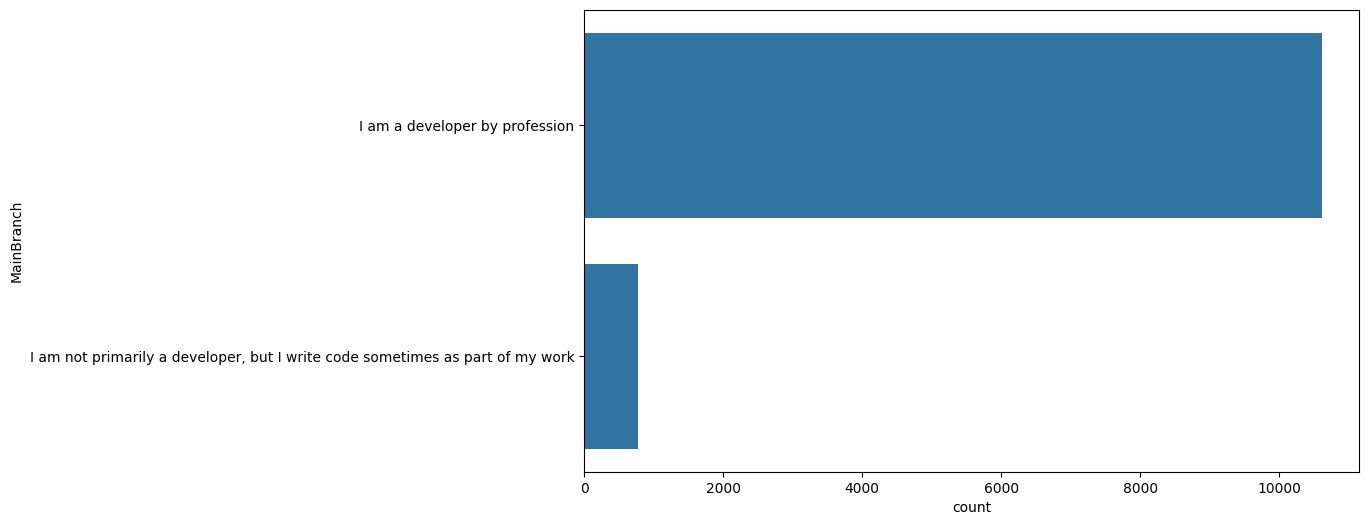

In [115]:
# your code goes here

plt.figure(figsize=(10,6))
sns.countplot(y='MainBranch', data=df)

plt.show()

Sekarang jawab pertanyaan graded quiz.
Pertanyaannya: 
- Question 1:
Majority of the survey responders are?

Untuk menjawab ini, kita perlu panggil tabel DevType

In [116]:
QUERY = """
SELECT *
FROM DevType
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df6 = pd.read_sql_query(QUERY,conn)
df6.head()

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"


In [120]:
# hitung masing-masing DevType
print('Tipe developer responden terbanyak:', df6['DevType'].value_counts().head(1).index)

Tipe developer responden terbanyak: Index(['Developer, full-stack'], dtype='object', name='DevType')


Pertanyaan selanjutnya:
- Question 2:
Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 

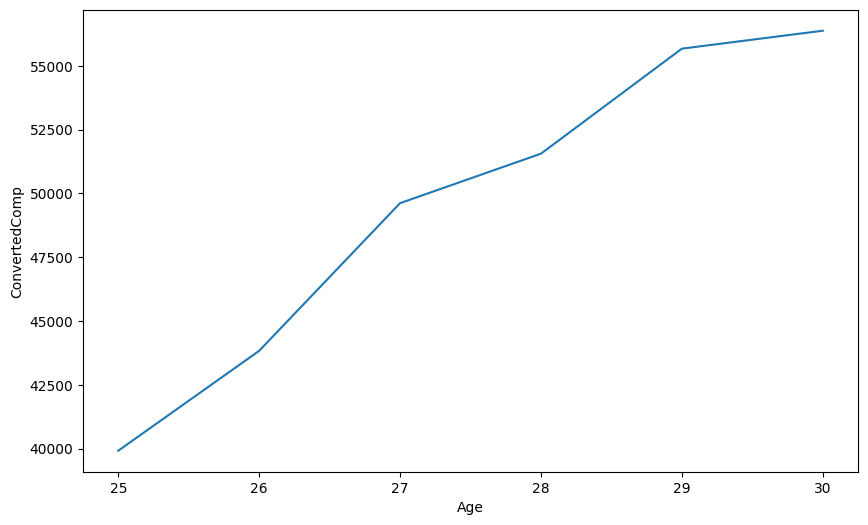

In [121]:
age_25_30 = df[(df['Age'] >= 25) & (df['Age'] <= 30)]
med_age_25_30 = age_25_30.groupby('Age')['ConvertedComp'].median()

plt.figure(figsize=(10,6))
sns.lineplot(med_age_25_30)

plt.show()

Positif korelasinya

Close the database connection.


In [122]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
